<a href="https://colab.research.google.com/github/mohammadsjahanbakhsh/deep_learning_keras/blob/main/practise_1_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [216]:
import numpy as np
import pandas as pd

## read data

In [217]:
from sqlalchemy.sql.expression import column
from urllib.request import urlopen

data_url = "http://lib.stat.cmu.edu/datasets/boston"
response = urlopen(data_url)

columns_describe = response.readlines()[7:21]

columns=[str(i).split(" ",maxsplit=2)[1].strip() for i in columns_describe]

raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = pd.DataFrame(np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) , columns = columns[:-1] )
target = pd.Series(raw_df.values[1::2, 2],name=columns[-1])

In [218]:
# information aboate dataset
print(columns_describe)

[b' CRIM     per capita crime rate by town\n', b' ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n', b' INDUS    proportion of non-retail business acres per town\n', b' CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n', b' NOX      nitric oxides concentration (parts per 10 million)\n', b' RM       average number of rooms per dwelling\n', b' AGE      proportion of owner-occupied units built prior to 1940\n', b' DIS      weighted distances to five Boston employment centres\n', b' RAD      index of accessibility to radial highways\n', b' TAX      full-value property-tax rate per $10,000\n', b' PTRATIO  pupil-teacher ratio by town\n', b' B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n', b' LSTAT    % lower status of the population\n', b" MEDV     Median value of owner-occupied homes in $1000's\n"]


In [219]:
df=pd.concat([data,target],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## feature selection with [mutual imformation , covariance and variance ] just choose 3 feature

In [220]:
X = df.iloc[:,:-1].astype("float32")
y = df.iloc[:,-1].astype("float32")

In [221]:
# The scikit-learn algorithm for MI treats discrete features differently from continuous features.

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes
discrete_features = X.dtypes == int

In [222]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X,y,discrete_features):
  mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)

  mi_scores = pd.Series(mi_scores, name="MI scores" , index=X.columns)
  mi_scores=mi_scores.sort_values(ascending=False)
  return mi_scores

mi_scores = make_mi_scores(df.iloc[:,:-1],df.iloc[:,-1],discrete_features)

mi_scores

LSTAT      0.668616
RM         0.525362
INDUS      0.473991
NOX        0.462646
PTRATIO    0.429943
TAX        0.366812
CRIM       0.347462
AGE        0.311497
DIS        0.296797
RAD        0.221725
ZN         0.195482
B          0.168129
CHAS       0.016985
Name: MI scores, dtype: float64

In [223]:
# see Covariance features

# Choose "LSTAT" and "RM" because are has more {Covariance and mutual_information} than other
cor_abs = np.abs(df.corr()['MEDV'])
cor_abs.sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

In [224]:
best_col = mi_scores.index[:6]
best_col

Index(['LSTAT', 'RM', 'INDUS', 'NOX', 'PTRATIO', 'TAX'], dtype='object')

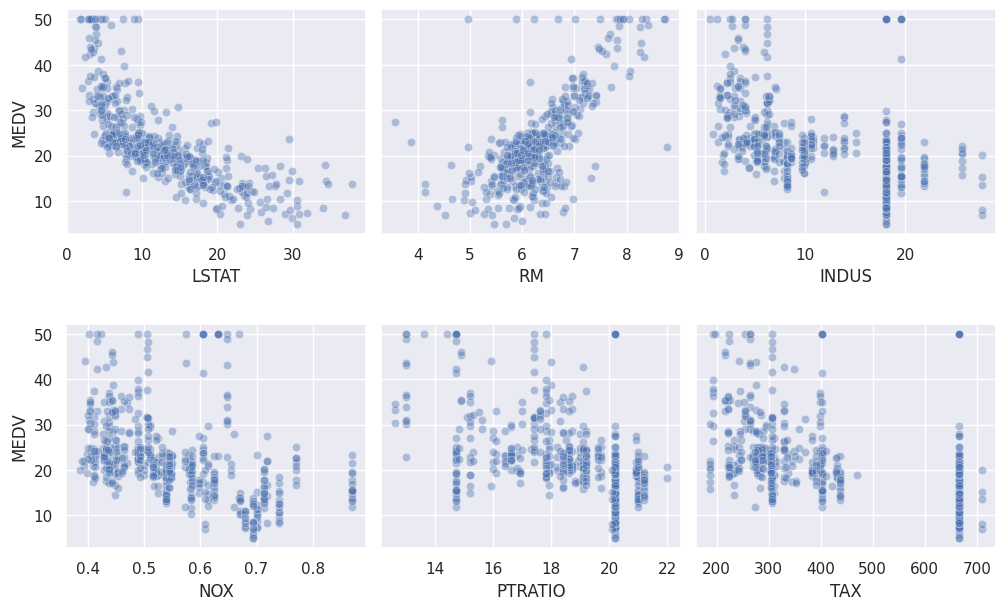

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Setting seaborn as default style even if use only matplotlib
fig, ax = plt.subplots(2, 3 ,figsize=(12,7), sharey=True)
fig.subplots_adjust(hspace=0.4, wspace=0.05)
k=0
for i in range(2):
  for j in range(3):
    sns.scatterplot(ax=ax[i, j] , x=best_col[k] , y="MEDV",data=df,alpha=.4)
    ax[i, j].set_xlabel(best_col[k])

    k+=1

In [226]:
# Choose "INDUS" because it has more variance than "PTRATIO"
df.var().sort_values()

NOX            0.013428
CHAS           0.064513
RM             0.493671
DIS            4.434015
PTRATIO        4.686989
INDUS         47.064442
LSTAT         50.994760
CRIM          73.986578
RAD           75.816366
MEDV          84.586724
ZN           543.936814
AGE          792.358399
B           8334.752263
TAX        28404.759488
dtype: float64

## modeling

In [227]:
X[best_col[:2]]

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [228]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train,y_test = train_test_split(X[best_col[:2]],y)

In [229]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [230]:
from tensorflow import keras
from keras import Sequential
from keras import layers
from sklearn.metrics import r2_score

In [247]:
model = Sequential()
model.add(layers.Dense(64, kernel_initializer = keras.initializers.HeNormal(),activation="relu",input_shape=(2,)))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(1))

model.compile(
   loss = 'mse',
   optimizer = "rmsprop",
   metrics = ['mean_absolute_error']
)

history = model.fit(
   X_train_scaled, y_train,
   batch_size=8,
   epochs = 500,

   validation_split = 0.2,
   callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 20)]
)

Epoch 1/500
38/38 [==============================] - 1s 9ms/step - loss: 387.8706 - mean_absolute_error: 17.8723 - val_loss: 245.6241 - val_mean_absolute_error: 14.3405
Epoch 2/500
38/38 [==============================] - 0s 3ms/step - loss: 193.5318 - mean_absolute_error: 12.3578 - val_loss: 115.0208 - val_mean_absolute_error: 9.7706
Epoch 3/500
38/38 [==============================] - 0s 3ms/step - loss: 101.2014 - mean_absolute_error: 8.2186 - val_loss: 70.2405 - val_mean_absolute_error: 6.8567
Epoch 4/500
38/38 [==============================] - 0s 3ms/step - loss: 80.6054 - mean_absolute_error: 6.9090 - val_loss: 63.8735 - val_mean_absolute_error: 6.3712
Epoch 5/500
38/38 [==============================] - 0s 3ms/step - loss: 74.2703 - mean_absolute_error: 6.5537 - val_loss: 58.0491 - val_mean_absolute_error: 6.1168
Epoch 6/500
38/38 [==============================] - 0s 3ms/step - loss: 68.6733 - mean_absolute_error: 6.2868 - val_loss: 53.1874 - val_mean_absolute_error: 5.8600
Ep

In [ ]:
Epoch 156/500
38/38 [==============================] - 0s 3ms/step - loss: 22.2803 - mean_absolute_error: 3.0939 - val_loss: 10.2324 - val_mean_absolute_error: 2.4783

In [ ]:
Epoch 87/500
38/38 [==============================] - 0s 3ms/step - loss: 23.3342 - mean_absolute_error: 3.1932 - val_loss: 10.7995 - val_mean_absolute_error: 2.6248

## validation model

In [248]:
score = model.evaluate(X_test_scaled, y_test )
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 4ms/step - loss: 13.9366 - mean_absolute_error: 2.8211
Test loss: 13.936620712280273
Test accuracy: 2.821148633956909


In [249]:
y_pred = model.predict(X_test_scaled).flatten()
print("Test r2_score :",r2_score(y_true=y_test , y_pred=y_pred))

4/4 [==============================] - 0s 3ms/step
Test r2_score : 0.8210917679373588


### visualize

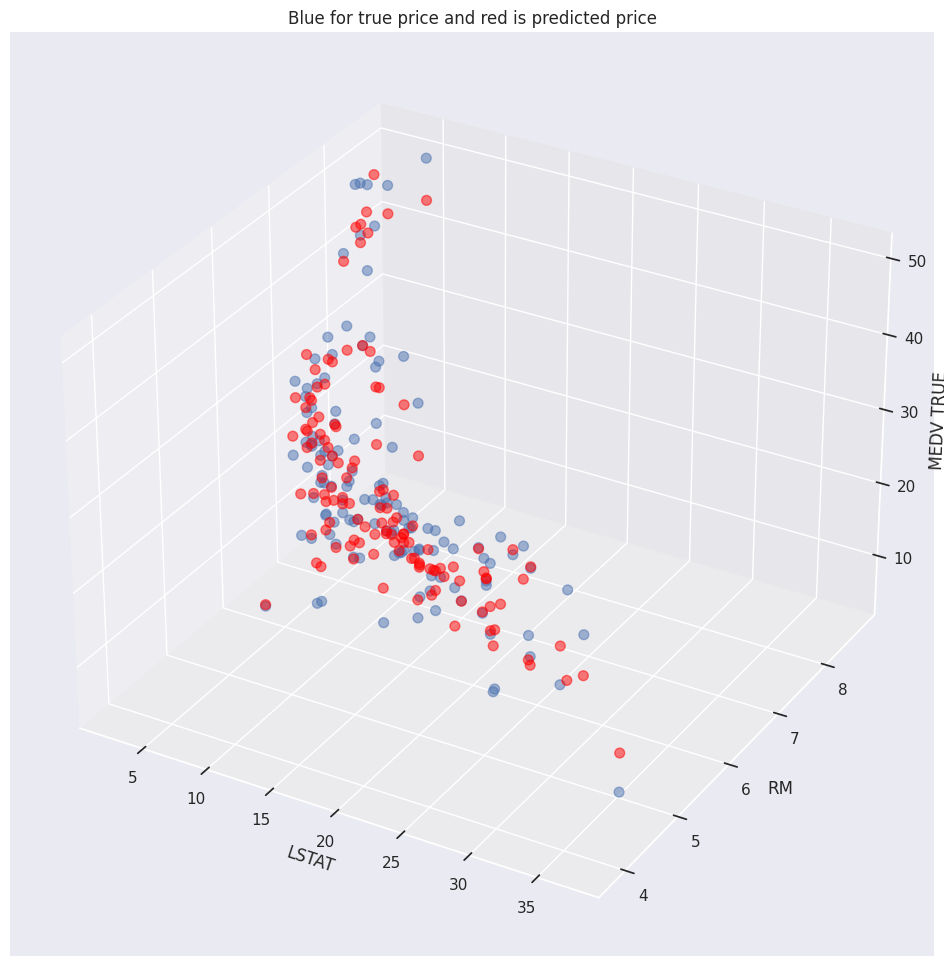

In [250]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

sns.set_style ("darkgrid")

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection = '3d')

x = X_test.iloc[:,0]
y = X_test.iloc[:,1]


ax.set_xlabel(best_col[0])
ax.set_ylabel(best_col[1])
ax.set_zlabel("MEDV TRUE")
ax.set_title("Blue for true price and red is predicted price")


ax.scatter(x, y, y_test,alpha=.5,s=50)
ax.scatter(x, y, y_pred,alpha=.5,c="red",s=50)

plt.show()